In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [15]:
book = pd.read_csv("book.csv")

#use apriori algorithm to get all rules for the data..

book_a = apriori(book , min_support = 0.008 ,  max_len = 4 , use_colnames = True)

# Most Frequent item sets based on support 
book_a.sort_values('support', ascending = False, inplace = True)
book_a

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(CookBks, ChildBks)"
...,...,...
379,0.0085,"(DoItYBks, CookBks, ItalAtlas, ArtBks)"
336,0.0080,"(YouthBks, GeogBks, CookBks, ItalAtlas)"
369,0.0080,"(YouthBks, GeogBks, ItalAtlas, ItalCook)"
318,0.0080,"(ItalCook, ItalArt, ChildBks, Florence)"


<ipython-input-12-27983ae0936f>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = book_a.support[0:11], color ='rgmykb');plt.xticks(list(range(0, 11)), book_a.itemsets[0:11], rotation=20)


([<matplotlib.axis.XTick at 0x1c508521640>,
 [Text(0, 0, "frozenset({'CookBks'})"),
  Text(1, 0, "frozenset({'ChildBks'})"),
  Text(2, 0, "frozenset({'DoItYBks'})"),
  Text(3, 0, "frozenset({'GeogBks'})"),
  Text(4, 0, "frozenset({'CookBks', 'ChildBks'})"),
  Text(5, 0, "frozenset({'YouthBks'})"),
  Text(6, 0, "frozenset({'ArtBks'})"),
  Text(7, 0, "frozenset({'RefBks'})"),
  Text(8, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(9, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(10, 0, "frozenset({'DoItYBks', 'CookBks'})")])

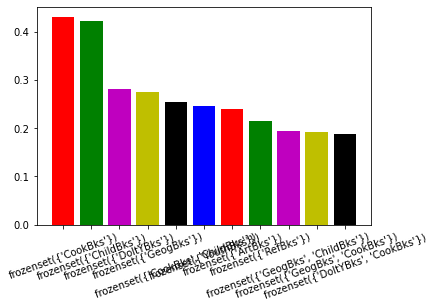

In [12]:
#plotting barplot for visualizatin of the data regarding their support.
plt.bar(x = list(range(0, 11)), height = book_a.support[0:11], color ='rgmykb');plt.xticks(list(range(0, 11)), book_a.itemsets[0:11], rotation=20)

In [13]:
#get the most frequent pair as per their lift by using association rule function.
rules = association_rules(book_a, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2148,"(ItalArt, RefBks)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2149,"(ItalAtlas, ArtBks)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3349,"(GeogBks, ItalAtlas)","(ItalArt, RefBks)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3348,"(ItalArt, RefBks)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3135,"(ItalAtlas, ItalCook)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667
3134,"(ItalArt, RefBks)","(ItalAtlas, ItalCook)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
2653,"(ItalAtlas, ChildBks)","(ItalArt, RefBks)",0.0285,0.0200,0.0145,0.508772,25.438596,0.01393,1.995000
2656,"(ItalArt, RefBks)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
3914,"(ItalArt, RefBks)","(DoItYBks, ItalAtlas)",0.0200,0.0190,0.0095,0.475000,25.000000,0.00912,1.868571
3911,"(DoItYBks, ItalAtlas)","(ItalArt, RefBks)",0.0190,0.0200,0.0095,0.500000,25.000000,0.00912,1.960000


In [20]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]



In [21]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3700,"(GeogBks, ItalAtlas, ChildBks)",(ItalArt),0.0175,0.0485,0.0100,0.571429,11.782032,0.009151,2.220167
4196,"(YouthBks, ItalArt)",(ItalAtlas),0.0230,0.0370,0.0085,0.369565,9.988249,0.007649,1.527517
2162,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
1854,"(YouthBks, ItalArt, CookBks)",(ItalCook),0.0195,0.1135,0.0190,0.974359,8.584661,0.016787,34.573500
3006,"(ItalArt, CookBks)",(ItalAtlas),0.0410,0.0370,0.0130,0.317073,8.569545,0.011483,1.410107
3824,"(DoItYBks, ItalArt)",(ItalAtlas),0.0300,0.0370,0.0095,0.316667,8.558559,0.008390,1.409268
3032,"(ItalArt, CookBks, ItalAtlas)",(ItalCook),0.0130,0.1135,0.0125,0.961538,8.471705,0.011025,23.049000
3238,"(YouthBks, CookBks, ItalAtlas)",(ItalCook),0.0125,0.1135,0.0120,0.960000,8.458150,0.010581,22.162500
1208,"(ItalArt, CookBks, ChildBks)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.730000
2366,"(GeogBks, CookBks, ItalAtlas)",(ItalCook),0.0160,0.1135,0.0150,0.937500,8.259912,0.013184,14.184000
